<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Text_Mining/Text_Analysis_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

# Dataset

For illustration purposes, we will use a UCI dataset of Youtube comments along with their classification as ham or spam.

In [ ]:
pip install ucimlrepo pandas

In [ ]:
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id=380)

text_df = data.data.features[["CONTENT"]]
class_df = data.data.targets



In [ ]:
text_df

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿
...,...
1951,I love this song because we sing it at Camp al...
1952,I love this song for two reasons: 1.it is abou...
1953,wow
1954,Shakira u are so wiredo


In [ ]:
class_df

,CLASS
0,1
1,1
2,1
3,1
4,1
...,...
1951,0
1952,0
1953,0
1954,0


In [ ]:
# How many unique comments?
text_df["CONTENT"].nunique()

There are many duplicate entries. They inflate the dataset. Let's remove them

In [ ]:
# Combine text and labels
df = text_df.join(class_df)

# Drop duplicate messages based on CONTENT
df = df.drop_duplicates(subset=["CONTENT"])

# Split back
text_df = df[["CONTENT"]]
class_df = df[class_df.columns]

# Basic Regex and Text Cleaning and Manipulation

If your algorithm may be confused by the same word appearing in different cases (e.g., I vs. i), you may want to convert all text to lowercase.

In [ ]:
import pandas as pd

# we can lower case
text_df_modified = pd.DataFrame(text_df["CONTENT"].str.lower())
text_df_modified

,CONTENT
0,"huh, anyway check out this you[tube] channel: ..."
1,hey guys check out my new channel and our firs...
2,just for test i have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtarggvgtwq check this out .﻿
...,...
1950,well done shakira
1951,i love this song because we sing it at camp al...
1952,i love this song for two reasons: 1.it is abou...
1954,shakira u are so wiredo


If your algorithm may benefit from unifying formal "you" and slang "u" into one term, you may want to convert one to another.

In [ ]:
# replace u with you
text_df_modified = pd.DataFrame(text_df["CONTENT"].str.replace(r"\bu\b", "you", regex=True))
text_df_modified

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿
...,...
1950,well done shakira
1951,I love this song because we sing it at Camp al...
1952,I love this song for two reasons: 1.it is abou...
1954,Shakira you are so wiredo


If you believe punctuation is just introducing noise to your data, you may want to remove it.

In [ ]:
# remove punctuation
text_df_modified = pd.DataFrame(text_df["CONTENT"].str.replace(r'[^\w\s]','', regex=True))
text_df_modified

,CONTENT
0,Huh anyway check out this youtube channel koby...
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdevcom
3,me shaking my sexy ass on my channel enjoy _
4,watchvvtaRGgvGtWQ Check this out
...,...
1950,well done shakira
1951,I love this song because we sing it at Camp al...
1952,I love this song for two reasons 1it is about ...
1954,Shakira u are so wiredo


If you want to block all YouTubers creating spammy comments, you might want to extract a list of their video IDs

In [ ]:
text_df_modified = text_df[text_df["CONTENT"].str.contains(r'watch\?v\=', regex=True)]  # list of spammy comments with YouTube video ids
text_df_videos = text_df_modified["CONTENT"].str.findall(r"watch\?v=(\w+)")  # list of video IDs

display(text_df_modified)
display(text_df_videos)

,CONTENT
4,watch?v=vtaRGgvGtWQ Check this out .﻿
33,"Check out my dubstep song ""Fireball"", made wit..."
377,Watch Maroon 5's latest 2nd single from V (It ...
611,Check out my drum cover of E.T. here! thanks -...
700,"<a href=""http://www.youtube.com/watch?v=KQ6zr6..."
730,This Will Always Be My Favorite Song<br />But ...
792,Support the fight for your 4th amendment right...
1005,Youtube comments in a nut shell:<br /><br />.F...
1247,Check out Em&#39;s dope new song monster here:...
1256,youtube.com/watch?v=2ASFn9ShgHk&amp;feature=yo...


,CONTENT
4,[vtaRGgvGtWQ]
33,[telOA6RIO8o]
377,[TQ046FuAu00]
611,[NO9pOVZ9OIQ]
700,[KQ6zr6kCPj8]
730,"[KQ6zr6kCPj8, KQ6zr6kCPj8]"
792,[KQ6zr6kCPj8]
1005,[KQ6zr6kCPj8]
1247,[w6gkM]
1256,[2ASFn9ShgHk]


# Text Tokenization

[`nltk`](https://www.nltk.org/api/nltk.html) is a standard package for Natural Language Processing (NLP).

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize  #, sent_tokenize, WhitespaceTokenizer, RegexpTokenizer

tokens_df = text_df.apply(
    lambda x: word_tokenize(x["CONTENT"]),
    axis=1
).to_frame(name="tokens")

tokens_df["tokens"].iloc[2]

['just', 'for', 'test', 'I', 'have', 'to', 'say', 'murdev.com']

If you wish to detokenize

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenized_df = tokens_df.apply(
    lambda x: TreebankWordDetokenizer().detokenize(x["tokens"]), axis=1).to_frame(name="detokenized")

detokenized_df["detokenized"].iloc[2]

'just for test I have to say murdev.com'

# BoW and N-grams

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Let's say we want to build a spam detector. Let's use Logistic Regression

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

#model
cv = CountVectorizer( tokenizer=word_tokenize, stop_words='english', lowercase=True) # max_df= 0.95, min_df=0.01, , token_pattern=r"\b\w+\b" OR tokenizer=word_tokenize

# fit
cv.fit(text_df["CONTENT"])

print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


number of `tokens` 4573


{'huh': 2154,
 ',': 28,
 'check': 1084,
 '[': 550,
 'tube': 4051,
 ']': 555,
 'channel': 1066,
 ':': 539,
 'kobyoshi02': 2416,
 'hey': 2085,
 'guys': 1998,
 'new': 2864,
 'vid': 4177,
 'monkeys': 2774,
 '!': 0,
 "'m": 16,
 'monkey': 2773,
 'white': 4301,
 'shirt': 3550,
 'leave': 2470,
 'like': 2495,
 'comment': 1171,
 'subscribe': 3791,
 'just': 2364,
 'test': 3921,
 'say': 3463,
 'murdev.com': 2817,
 'shaking': 3530,
 'sexy': 3524,
 'ass': 764,
 'enjoy': 1578,
 '^_^': 558,
 '\ufeff': 4538,
 'watch': 4265,
 '?': 548,
 'v=vtarggvgtwq': 4150,
 '.\ufeff': 75,
 'website': 4281,
 'site': 3608,
 'kids': 2393,
 'stuff': 3777,
 '.': 42,
 'kidsmediausa': 2394,
 'com': 1157,
 'turned': 4057,
 'mute': 2827,
 'soon': 3675,
 'came': 1009,
 'wanted': 4251,
 'views': 4196,
 '...': 44,
 'funny': 1854,
 'videos': 4181,
 'u': 4076,
 'should.d': 3566,
 'tell': 3910,
 'me\ufeff': 2709,
 'started': 3742,
 'reading': 3286,
 'stop': 3759,
 'day': 1348,
 "'re": 17,
 'entire': 1592,
 'family': 1684,
 'die': 1

In [ ]:
data_vectorized = cv.transform(text_df["CONTENT"])
data_vectorized_df = pd.DataFrame(data_vectorized.toarray(), columns=cv.get_feature_names_out())
data_vectorized_df

,!,#,$,%,&,','','33﻿,'cause,'crazy,...,😢﻿,😫😓😏😪😔😖😌😭😎😚😘😙😗😋😝😜😛😍😒😞😷😶😵😳😲😱😟😰😩😨😧😦😥😤😣😮😴😢😡😠😬😕😑😐😯😉😈😇😆😅😄😃😂😁😀😊☺,😯﻿,😱👏keep,😻✌💓😻👏﻿,😼👍😏,🙌﻿,🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨﻿,🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨,🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨subscribe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1756,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
text_df["CONTENT"].iloc[2]

'just for test I have to say murdev.com'

In [ ]:
data_vectorized_df.iloc[2].values

array([0, 0, 0, ..., 0, 0, 0])

Can we obtain the original text back?

In [ ]:
cv.inverse_transform([data_vectorized_df.iloc[2]])

[array(['just', 'murdev.com', 'say', 'test'], dtype='<U411')]

Train and test a logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(text_df["CONTENT"], class_df["CLASS"], test_size=0.2, stratify=class_df, random_state=42)

cv = CountVectorizer() # max_df= 0.95, min_df=0.01, , token_pattern=r"\b\w+\b" OR tokenizer=word_tokenize , lowercase=True, stop_words='english', ngram_range=(3,5)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.966


,0,1
0,0.972826,0.027174
1,0.041667,0.958333


In [ ]:
class_df["CLASS"].value_counts()

,count
CLASS,
0,919
1,841


##**Questions**

1. Which text preprocessing steps help or harm the classification task?
Discuss the impact of different preprocessing choices on model performance.

2. Do n-gram models with larger values of n outperform a plain Bag-of-Words (BoW) representation?
Explain your answer using both empirical results and theoretical reasoning.

3. What happens when you switch from word-level tokenization to character-level tokenization?
Does this change improve or degrade classification performance? Why?

4. By examining the vectorized table `data_vectorized_df`, which unsupervised learning technique(s) can be used to discover underlying text patterns?
Apply an appropriate method and report the top five most common patterns you find.

5. Does replacing BoW features with some engineered features (e.g., text length, number of exclamation marks, capitalization patterns) lead to better results?

6. Which tokens does logistic regression consider most influential in its classification decisions?
Explain how you identified these tokens and interpret their importance.

# Euclidean vs. Cosine Similarity

Let's compare a couple of messages and see which distance metric is more useful.

In [ ]:
# text_df rows that contain ❤️

mask = (
    text_df["CONTENT"].str.contains("❤", case=False, na=False) |
    text_df["CONTENT"].str.contains("❤️", case=False, na=False)
)

text_df_withhearts = text_df[mask]
text_df_withhearts

,CONTENT
134,❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿
533,Awesome video this is one of my favorite song...
1127,The best Song i saw ❤️❤️❤️❤️❤️❤️❤️❤️😍😍😍😍😍😍😍😘😘😘...
1144,Go check out my rapping video called Four Whee...
1184,Love😘❤💖﻿
1220,❤❤❤❤❤❤❤﻿
1231,I love you!❤✨﻿
1346,"HEY GUYS!!! ❤❤❤❤❤❤❤ BEFORE YOU IGNORE ME, PLE..."
1398,Never gets old best song ever ❤﻿
1538,❤️❤️❤️﻿


Create Text Representation

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# tokenizer
char_tokenizer = RegexpTokenizer(r'.')

#model
cv = CountVectorizer(tokenizer=char_tokenizer.tokenize, lowercase=True) # max_df= 0.95, min_df=0.01, , token_pattern=r"\b\w+\b" OR tokenizer=word_tokenize , stop_words='english'

# fit
text_df_withhearts_tokenized = cv.fit_transform(text_df_withhearts["CONTENT"])

text_df_withhearts_tokenized = pd.DataFrame(text_df_withhearts_tokenized.toarray(), columns=cv.get_feature_names_out())
text_df_withhearts_tokenized

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,!,#,&,",",.,/,0,1,2,...,🎶,🎸,🎼,💄,💋,💎,💖,😀,😍,😘
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,4,4,5,0,7,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,8
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,81,11,1,1,3,5,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's try Euclidean distances

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euc_dist = euclidean_distances(text_df_withhearts_tokenized)
euc_dist_df = pd.DataFrame(
    euc_dist,
    index=text_df_withhearts.index,
    columns=text_df_withhearts.index
)
euc_dist_df

,134,533,1127,1144,1184,1220,1231,1346,1398,1538,1663,1666
134,0.000000,16.217275,11.789826,16.673332,11.618950,9.000000,11.357817,138.242540,13.928388,8.124038,13.038405,10.198039
533,16.217275,0.000000,17.320508,16.583124,20.297783,19.595918,19.078784,130.545011,16.703293,19.209373,18.947295,17.635192
1127,11.789826,17.320508,0.000000,18.193405,16.124515,15.099669,16.186414,135.874943,16.217275,14.594520,16.881943,14.866069
1144,16.673332,16.583124,18.193405,0.000000,14.798649,16.763055,13.076697,132.894695,8.602325,15.874508,12.649111,12.489996
1184,11.618950,20.297783,16.124515,14.798649,0.000000,6.480741,3.464102,143.742826,10.246951,4.358899,8.888194,6.244998
1220,9.000000,19.595918,15.099669,16.763055,6.480741,0.000000,7.211103,140.847435,12.529964,5.000000,10.816654,6.403124
1231,11.357817,19.078784,16.186414,13.076697,3.464102,7.211103,0.000000,142.105595,9.110434,5.385165,7.141428,5.567764
1346,138.242540,130.545011,135.874943,132.894695,143.742826,140.847435,142.105595,0.000000,136.729660,143.188687,139.746199,139.230025
1398,13.928388,16.703293,16.217275,8.602325,10.246951,12.529964,9.110434,136.729660,0.000000,11.575837,10.000000,9.055385
1538,8.124038,19.209373,14.594520,15.874508,4.358899,5.000000,5.385165,143.188687,11.575837,0.000000,9.695360,6.480741


Let's convert that to a similarity metric

In [ ]:
euc_similarity = 1.0 / (1.0 + euc_dist)
euc_similarity_df = pd.DataFrame(
    euc_similarity,
    index=text_df_withhearts.index,
    columns=text_df_withhearts.index
)
euc_similarity_df

,134,533,1127,1144,1184,1220,1231,1346,1398,1538,1663,1666
134,1.000000,0.058081,0.078187,0.056582,0.079246,0.100000,0.080920,0.007182,0.066986,0.109601,0.071233,0.089301
533,0.058081,1.000000,0.054584,0.056873,0.046953,0.048553,0.049804,0.007602,0.056487,0.049482,0.050132,0.053662
1127,0.078187,0.054584,1.000000,0.052101,0.058396,0.062113,0.058185,0.007306,0.058081,0.064125,0.055922,0.063028
1144,0.056582,0.056873,0.052101,1.000000,0.063297,0.056297,0.071039,0.007469,0.104141,0.059261,0.073265,0.074129
1184,0.079246,0.046953,0.058396,0.063297,1.000000,0.133677,0.224009,0.006909,0.088913,0.186605,0.101131,0.138026
1220,0.100000,0.048553,0.062113,0.056297,0.133677,1.000000,0.121786,0.007050,0.073910,0.166667,0.084626,0.135078
1231,0.080920,0.049804,0.058185,0.071039,0.224009,0.121786,1.000000,0.006988,0.098908,0.156613,0.122829,0.152259
1346,0.007182,0.007602,0.007306,0.007469,0.006909,0.007050,0.006988,1.000000,0.007261,0.006935,0.007105,0.007131
1398,0.066986,0.056487,0.058081,0.104141,0.088913,0.073910,0.098908,0.007261,1.000000,0.079518,0.090909,0.099449
1538,0.109601,0.049482,0.064125,0.059261,0.186605,0.166667,0.156613,0.006935,0.079518,1.000000,0.093498,0.133677


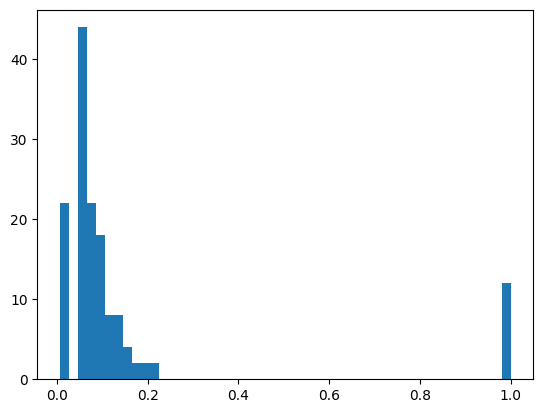

In [ ]:
# Plot histogram of all the values in euc_dist_df
import matplotlib.pyplot as plt

plt.hist(euc_similarity_df.values.flatten(), bins=50)
plt.show()

Let's try cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim = np.round(cosine_similarity(text_df_withhearts_tokenized), 2)
cos_sim_df = pd.DataFrame(
    cos_sim,
    index=text_df_withhearts.index,
    columns=text_df_withhearts.index
)
cos_sim_df

,134,533,1127,1144,1184,1220,1231,1346,1398,1538,1663,1666
134,1.00,0.65,0.72,0.30,0.26,0.67,0.33,0.58,0.28,0.93,0.26,0.53
533,0.65,1.00,0.61,0.63,0.37,0.38,0.57,0.72,0.62,0.53,0.45,0.63
1127,0.72,0.61,1.00,0.39,0.41,0.47,0.33,0.57,0.40,0.66,0.29,0.50
1144,0.30,0.63,0.39,1.00,0.40,0.07,0.70,0.79,0.85,0.10,0.59,0.64
1184,0.26,0.37,0.41,0.40,1.00,0.40,0.58,0.43,0.41,0.32,0.23,0.45
1220,0.67,0.38,0.47,0.07,0.40,1.00,0.27,0.59,0.10,0.71,0.12,0.59
1231,0.33,0.57,0.33,0.70,0.58,0.27,1.00,0.67,0.62,0.22,0.65,0.61
1346,0.58,0.72,0.57,0.79,0.43,0.59,0.67,1.00,0.76,0.41,0.59,0.82
1398,0.28,0.62,0.40,0.85,0.41,0.10,0.62,0.76,1.00,0.08,0.52,0.58
1538,0.93,0.53,0.66,0.10,0.32,0.71,0.22,0.41,0.08,1.00,0.10,0.43


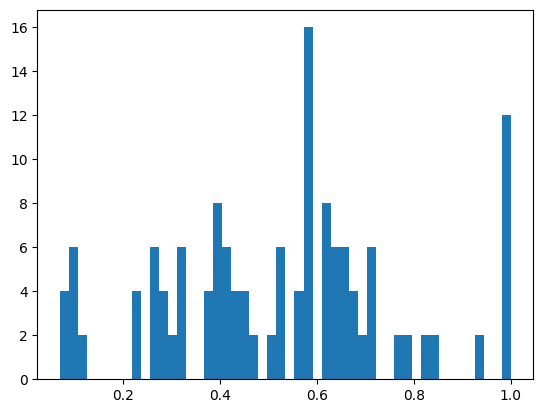

In [ ]:
# Plot histogram of all the values in euc_dist_df and stats (mean, std)
import matplotlib.pyplot as plt

plt.hist(cos_sim_df.values.flatten(), bins=50)
plt.show()

# Neural Embeddings

Let's now try a neural embedding approach. Gensim has a [list of pretained models](https://github.com/piskvorky/gensim-data). But, we can also train out own.

In [ ]:
!pip install gensim
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 77.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from gensim.utils import simple_preprocess

# Load the pretrained model
pretrained_model = api.load('glove-wiki-gigaword-50') # or other pretrained models

# or train your own Word2Vec on text_df["CONTENT"].
corpus = text_df["CONTENT"].tolist()
corpus = [word_tokenize(text) for text in corpus]
# corpus = [simple_preprocess(text) for text in corpus] #You may optionally tokenize and clean up
word2vec_trained_model = Word2Vec(sentences=corpus) # Take a look at the arguments you have

In [ ]:
#The model's vocabulary
word2vec_trained_model.wv.key_to_index

{'!': 0,
 '.': 1,
 'I': 2,
 ';': 3,
 'the': 4,
 ':': 5,
 '\ufeff': 6,
 'and': 7,
 'to': 8,
 ',': 9,
 '&': 10,
 'this': 11,
 'a': 12,
 'my': 13,
 'you': 14,
 '>': 15,
 '<': 16,
 'out': 17,
 '?': 18,
 'is': 19,
 'it': 20,
 '#': 21,
 '/': 22,
 'br': 23,
 'of': 24,
 '39': 25,
 'on': 26,
 ')': 27,
 'check': 28,
 'song': 29,
 'i': 30,
 'for': 31,
 'me': 32,
 "''": 33,
 'like': 34,
 'in': 35,
 'video': 36,
 'so': 37,
 '*': 38,
 'http': 39,
 'amp': 40,
 'love': 41,
 'channel': 42,
 'if': 43,
 'You': 44,
 'can': 45,
 'just': 46,
 'that': 47,
 'Check': 48,
 'subscribe': 49,
 'please': 50,
 '...': 51,
 'have': 52,
 'https': 53,
 'music': 54,
 'guys': 55,
 '(': 56,
 '-': 57,
 'your': 58,
 'are': 59,
 'but': 60,
 'am': 61,
 'will': 62,
 'be': 63,
 'do': 64,
 'views': 65,
 'up': 66,
 'at': 67,
 'with': 68,
 'from': 69,
 'quot': 70,
 'get': 71,
 'The': 72,
 '%': 73,
 'all': 74,
 'Please': 75,
 'money': 76,
 'm': 77,
 't': 78,
 '..': 79,
 'This': 80,
 'make': 81,
 'people': 82,
 's': 83,
 'not': 84,
 

In [ ]:
# A word's embedding
word2vec_trained_model.wv["hi"]

array([-6.7777536e-03,  1.6695930e-02, -3.9730631e-03,  2.7623810e-02,
       -8.2622068e-03, -4.4858005e-02,  2.8109027e-02,  6.9868177e-02,
       -6.3145123e-02, -1.8700955e-02,  4.5976280e-03, -5.2418735e-02,
       -3.7514113e-03,  1.6260585e-02,  7.7486197e-03, -1.2816397e-02,
        2.0885270e-02, -2.1259146e-02, -2.6512170e-02, -5.3016834e-02,
        3.2042820e-02, -1.6341653e-02,  4.3893971e-02, -1.2220292e-02,
       -1.8993999e-03, -1.4262303e-02, -1.9355867e-02,  1.8869881e-02,
       -2.0228688e-02, -1.0049861e-02,  1.4515128e-02, -4.4643693e-04,
        4.9663588e-02, -9.1958372e-03, -2.7703470e-02,  1.2498608e-02,
        9.9299978e-03, -3.4640394e-02, -2.1648770e-03, -5.8371130e-02,
       -3.4413811e-02, -4.7334451e-03, -6.1170519e-03, -2.1392150e-02,
        3.3369876e-02, -2.0601347e-03, -3.4712799e-02,  7.4540982e-03,
        4.7983296e-02,  3.4092158e-02, -7.9959491e-03, -5.1867184e-03,
        8.8649113e-03, -9.1425776e-03,  1.3462692e-03, -1.8880200e-02,
      

In [ ]:
# Get a sentence embedding
sentence = text_df["CONTENT"].iloc[0]
word2vec_trained_model.wv.get_mean_vector(sentence, ignore_missing=True)

array([-0.05779855,  0.07159787, -0.08640589, -0.01798564,  0.02238827,
       -0.18629254,  0.12861678,  0.2290555 , -0.15646997, -0.06444592,
       -0.02167229, -0.18790486, -0.01840001, -0.03673969,  0.08576755,
       -0.08333646,  0.03778603, -0.17175026, -0.00822726, -0.19865897,
        0.03963308, -0.01803694,  0.11523917, -0.02982808, -0.05144758,
        0.01893715, -0.08441494, -0.03069894, -0.03646379,  0.02669855,
        0.09257986,  0.0027711 ,  0.11474961, -0.01960259, -0.09868448,
        0.11482982, -0.00088184, -0.09763657, -0.04614975, -0.17895298,
       -0.01403219, -0.06120042,  0.01087963, -0.00442905,  0.11872677,
       -0.01460926, -0.06998697, -0.0608278 ,  0.15159461,  0.08413865,
        0.06935167, -0.08956217,  0.02449628, -0.09799851, -0.04378216,
       -0.05207796,  0.06146248,  0.04854959, -0.06386415,  0.03663851,
        0.02648654,  0.01240792,  0.04045847, -0.03942188, -0.27748686,
        0.15472822, -0.02640053,  0.16444197, -0.1858603 ,  0.12

In [ ]:
# Get similarity score
sentence1 = text_df["CONTENT"].iloc[0]
sentence2 = text_df["CONTENT"].iloc[1]
sim_score = word2vec_trained_model.wv.n_similarity(word_tokenize(sentence1), word_tokenize(sentence2))

print(sentence1)
print(sentence2)
print("similarity score:", sim_score)

Huh, anyway check out this you[tube] channel: kobyoshi02
Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
similarity score: 0.91430414


Manipulating an embedding

In [ ]:
# Finding feminine-transformation (man -> woman) of "King"
pretrained_model.most_similar(positive=['woman', 'king'], negative=['man'])

# Finding audio-to-video-transformation (radio -> television) of "talking"
# pretrained_model.most_similar(positive=['television', 'talking'], negative=['radio'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

### Spam classification with neural embeddings

Let's perform spam calssification using the neural embeddings

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(text_df["CONTENT"].tolist(), class_df["CLASS"], test_size=0.2, stratify=class_df["CLASS"], random_state=42)

# X_train = [word_tokenize(text) for text in X_train]
# X_test = [word_tokenize(text) for text in X_test]
#You may optionally tokenize and clean up
X_train = [simple_preprocess(text) for text in X_train]
X_test  = [simple_preprocess(text) for text in X_test]

embedding_model = Word2Vec(sentences=X_train, epochs=50).wv # Take a look at the arguments you have such as vector_size min_count epochs
# embedding_model = pretrained_model

X_train = [embedding_model.get_mean_vector(text, ignore_missing=True) if text else np.zeros(embedding_model.vector_size) for text in X_train]
X_test = [embedding_model.get_mean_vector(text, ignore_missing=True) if text else np.zeros(embedding_model.vector_size) for text in X_test]

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.889


,0,1
0,0.902174,0.097826
1,0.125000,0.875000


##Questions:

- Plot and compare the word embeddings of different models (BoW, pre-trained, word2vec, etc.). Record the differences and any interesting observations based on your visualization.
- Initially, BoW representation yields better spam classification performance than neural embeddings. Is there anything you could do to boost the performance of a neural-embedding-based classifier? If yes, enumerate the modifications. If no, what is your explanation?
- Would dimensionality reduction help improve the classifier's performance?
- What would text message clustering look like? What do the resulting clusters represent?

## Pretrained Deep Learning Embedding

Let's try now more advanced deep learning models that produce more sophisticated embeddings that take word order into account.

Let's use a pre-trained model from [`SentenceTransformer`](https://www.sbert.net/docs/sentence_transformer/pretrained_models.html).


In [ ]:
# !pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = text_df["CONTENT"].loc[[1950, 1954, 1955, 1951, 2]]
print(sentences)

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences.tolist())
print(embeddings.shape)

1950                                    well done shakira
1954                              Shakira u are so wiredo
1955                           Shakira is the best dancer
1951    I love this song because we sing it at Camp al...
2                  just for test I have to say murdev.com
Name: CONTENT, dtype: object
(5, 384)


In [ ]:
# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)

tensor([[ 1.0000,  0.7430,  0.7352,  0.1447,  0.0823],
        [ 0.7430,  1.0000,  0.6828,  0.1945,  0.0382],
        [ 0.7352,  0.6828,  1.0000,  0.1634,  0.0794],
        [ 0.1447,  0.1945,  0.1634,  1.0000, -0.0066],
        [ 0.0823,  0.0382,  0.0794, -0.0066,  1.0000]])


## Pretrained Deep Learning Classifier

Instead of extracting embeddings and then training logistic regression, how about we use a pre-trained deep learning classifier?

Searching `huggingface` for a suitable model for ham/spam classification, one could find the following [Bert_Spam_ham](https://huggingface.co/saadkiet/Fine_Tuned_bert_Spam_ham) model.



In [ ]:
#!pip install transformers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="udit-k/HamSpamBERT")

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sentences = text_df["CONTENT"].loc[[1950, 1954, 1955, 1951, 2]]
pd.concat([sentences, class_df.loc[[1950, 1954, 1955, 1951, 2]]], axis=1)

,CONTENT,CLASS
1950,well done shakira,0
1954,Shakira u are so wiredo,0
1955,Shakira is the best dancer,0
1951,I love this song because we sing it at Camp al...,0
2,just for test I have to say murdev.com,1


In [ ]:
pipe(sentences.to_list())

[{'label': 'LABEL_0', 'score': 0.9999351501464844},
 {'label': 'LABEL_0', 'score': 0.9999345541000366},
 {'label': 'LABEL_0', 'score': 0.9999347925186157},
 {'label': 'LABEL_0', 'score': 0.9999207258224487},
 {'label': 'LABEL_0', 'score': 0.9999369382858276}]

### Spam classification with a pretrained classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(text_df["CONTENT"].tolist(), class_df["CLASS"], test_size=0.2, stratify=class_df["CLASS"], random_state=42)

# Predict on the test data
y_pred = pipe(X_test, truncation=True)
# transform y_pred to 0s and 1s
y_pred = [1 if pred["label"] == "LABEL_1" else 0 for pred in y_pred]

# Evaluate the model
labels = pipe.model.config.id2label
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'))

Accuracy: 0.665


,0,1
0,0.945652,0.054348
1,0.642857,0.357143
